In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import SAUCIE
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
from tqdm import tqdm
from sklearn.metrics import roc_auc_score

sys.path.append(os.getcwd())

In [7]:

for i in range(1, 4):
    out_dir = './imputations/DS' + str(i) + '/'
    npfile = np.load(out_dir + 'DS6_clean.csv')
    df = pd.DataFrame(npfile)
    df.to_csv(out_dir + 'DS6_clean.csv')
out_dir = './imputations/DS1/'

npfile = np.load(out_dir + 'DS6_clean.npy')
    
df = pd.DataFrame(npfile)
df.to_csv(out_dir + 'DS6_clean.csv')
# !rm -rf ./imputations/DS3/version0
# !rm -rf ./imputations/DS3/version11
# !mkdir ./imputations/DS3/version0
# !mkdir ./imputations/DS3/version11


In [24]:
from utils import run_script_with_subprocess

method = 'DeepDRIM'
script_name = 'generate_input_realdata.py'

file = open(out_dir + 'pairs_for_predict.txt', 'w')
file2 = open(out_dir + 'name_map.txt', 'w')
i = 0
for g in range(0, 1200):
    file2.write(f"{g}\t{g}\n")
    for l in range(0, 1200):
        i = i % 3
        if l != g:
            file.write(f"{g}\t{l}\t{i}\n")
            i += 1
file.close()
file2.close()

expr_data = pd.DataFrame(np.load('./imputations/DS3/DS6_clean.npy'))#[-1,:,:])
expr_data.to_csv('./imputations/DS3/DS6_expr.csv')
# gold_standard = np.load(out_dir + 'DS6_45.npy')
# file = open(out_dir + 'true_data.txt', 'w')
# file2 = open(out_dir + 'name_map.txt', 'w')
# for i in tqdm(range(gold_standard.shape[0])):  # Rows
#     for j in range(gold_standard.shape[1]):  # Columns
#         # Write TF index, target index, and value to file
#         file.write(f"{i}\t{j}\t{gold_standard[i, j]}\n")
#         file2.write(f"{i}\t{j}\n")
# file.close()
# file2.close()

In [25]:
pd.read_csv('./Beeline/inputs/example/GSD/ExpressionData.csv')

,Unnamed: 0,E37_5_927,E42_7_69,E20_7_209,E70_2_163,E107_6_328,E131_7_61,E135_3_524,E106_4_886,E49_7_93,...,E49_5_847,E84_7_85,E131_5_207,E80_7_529,E136_2_083,E56_0_32,E126_5_126,E108_1_202,E88_2_804,E14_3_685
0,DMRT1,0.002393,0.022819,1.735100,1.151049,1.890542,0.009722,2.053196,0.023802,1.613059,...,2.246060,0.000466,0.016833,0.003818,1.866034,0.000512,0.038994,0.006577,1.300196,2.270333
1,FGF9,0.018852,0.037279,1.980331,0.000040,1.990571,0.048823,0.114901,0.050658,1.805327,...,1.904062,0.045235,0.018511,0.004962,0.027339,0.001724,0.001686,0.003088,0.034199,0.013843
2,RSPO1,2.204227,1.694255,0.014848,1.317834,0.008087,2.021238,0.019096,1.358292,0.015900,...,0.014341,2.032915,2.081133,2.407331,1.343396,0.010831,1.908148,0.054142,2.061903,1.658503
3,DHH,0.000756,0.018763,1.753970,0.010211,1.289796,0.040491,0.017903,0.015283,1.487252,...,2.544519,0.024866,0.086468,0.004199,0.032520,0.058074,0.020227,0.006289,0.070051,0.009006
4,CTNNB1,2.776419,2.055143,0.004638,0.511992,0.004185,2.075902,0.018998,2.027986,0.056439,...,0.004023,1.863596,1.986502,2.106189,0.098844,0.000178,1.843179,0.042285,0.217818,0.025217
5,PGD2,0.008131,0.011980,2.127178,0.009347,2.151621,0.004154,0.019639,0.017165,2.215492,...,1.491170,0.011899,0.024619,0.003891,0.036414,0.001095,0.002756,0.018015,0.014489,0.000122
6,WT1mKTS,2.194327,1.314203,1.997978,1.645307,1.799296,2.435336,1.924630,2.685747,2.037330,...,2.041485,2.238445,2.571245,2.497718,2.150332,1.071075,1.553981,1.435331,1.521691,2.428851
7,SRY,0.003504,0.096546,1.735059,2.461830,2.415013,0.018451,2.088291,0.010008,1.675795,...,1.638549,0.030225,0.016798,0.046835,1.809163,0.002193,0.024957,0.005389,1.950572,1.933247
8,DKK1,0.050069,0.002064,2.187727,1.260056,1.500176,0.035081,1.941010,0.000237,2.297579,...,2.013304,0.019541,0.052973,0.025913,1.711050,0.025958,0.000088,0.013083,1.766972,2.387735
9,WNT4,2.323997,1.979665,0.035073,1.402746,0.002347,1.405157,0.048907,2.464842,0.009660,...,0.011728,1.969862,1.784424,2.110398,1.909738,0.009784,1.649016,0.336278,2.471026,2.067695


In [26]:
pd.read_csv('./imputations/DS3/DS6_expr.csv')

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699
0,0,0.180839,2.653102,1.520502,1.669994,0.721948,0.816209,0.857041,2.732153,1.152058,...,0.409348,0.120039,0.472651,0.613810,0.134942,0.944872,0.370196,0.280549,0.643507,0.218016
1,1,3.456605,3.512390,3.351080,2.973905,2.623309,2.025447,3.450478,1.447021,1.320070,...,4.002133,2.801950,1.470272,2.485001,6.294323,5.441409,2.942971,4.112768,3.778170,4.566461
2,2,0.697471,2.222222,2.002463,4.323873,2.352873,6.947755,0.682664,2.469344,3.983317,...,1.930450,0.493106,1.208464,0.370161,0.570654,0.333201,2.504954,0.526384,0.330613,1.118712
3,3,2.287902,4.508381,5.464746,3.467251,2.294328,2.277970,2.287535,4.068407,5.072988,...,0.416531,3.472961,2.960144,0.133646,1.412822,0.220067,0.504457,2.003581,1.779719,0.132282
4,4,0.114738,0.377027,0.225470,2.554892,0.648909,0.880267,1.257647,2.388461,1.181196,...,6.758422,0.598705,2.454362,1.579223,8.137623,0.899022,1.195958,3.427304,2.324299,3.054373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,4.245445,1.778906,3.085766,1.828263,3.090410,2.277091,1.673041,0.594611,1.525443,...,2.454465,0.487894,1.378101,0.827553,0.475861,1.698630,0.860577,1.851442,2.670531,1.321829
1196,1196,2.756958,5.730997,3.804547,2.213866,1.032005,0.913551,1.702136,0.935109,6.938353,...,6.663596,1.371747,2.637164,1.297053,4.296710,2.213315,4.308946,0.442571,3.999500,7.400049
1197,1197,7.149173,3.197010,4.426305,3.588198,8.103112,7.239601,3.049835,4.155602,6.878255,...,1.431843,1.274631,1.537227,6.423506,3.593640,5.218230,4.811868,6.102674,5.843690,0.593169
1198,1198,1.474567,3.252964,5.624393,5.705044,2.938467,0.654483,3.529454,6.104640,8.324901,...,1.893063,2.967715,3.063908,1.384087,3.372708,1.577115,1.055631,1.758975,0.547213,0.879431


In [16]:
params = [
    '-out_dir', out_dir,
    '-expr_file', out_dir + 'DS6_expr.csv',
    '-pairs_for_predict_file', out_dir + 'pairs_for_predict.txt',
    '-geneName_map_file', out_dir + 'name_map.txt',
]
run_script_with_subprocess(method, script_name, params)

Running DeepDRIM ./DeepDRIM/generate_input_realdata.py
---> working ... main_for_representation_single_cell_type
---> working ... representation test for single cell type
---> working ... setting_for_one_pair
---> working ... get_gene_list
---> working ... load_real_data_singlecelltype
geneIDs ['0' '1' '2' ... '1197' '1198' '1199']
---> working ... get_gold_standard
---> working ... get_train_test


 46%|████▌     | 886/1919 [35:01<40:25,  2.35s/it]  /opt/homebrew/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


KeyboardInterrupt: 

In [28]:
for method in ['INFERELATOR']:#, 'NONLINEARODES']:
    script_name = method + '.py'

    params = [
        '-expression_data', out_dir + 'DS6_expr.csv',
        '-output_dir', out_dir,
    ]

    run_script_with_subprocess(method, script_name, params)

Running INFERELATOR ./GENECI/components/infer_network/INFERELATOR/INFERELATOR.py
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146',

/Users/joshuaweiner/Desktop/Folders/Projects/zero_imputation/venv/lib/python3.11/site-packages/inferelator/workflows/workflow_base.py:371: UserWarning: Omitting prior network data is not recommended. Performance will be poor. Use at your own risk.
  warnings.warn(
/Users/joshuaweiner/Desktop/Folders/Projects/zero_imputation/venv/lib/python3.11/site-packages/inferelator/workflows/workflow_base.py:378: UserWarning: Omitting gold standard is not recommended. Output performance metrics will be meaningless. Use at your own risk
  warnings.warn(
Traceback (most recent call last):
  File "/Users/joshuaweiner/Desktop/Folders/Projects/zero_imputation/./GENECI/components/infer_network/INFERELATOR/INFERELATOR.py", line 93, in <module>
    inferelator(in_file=args.expression_data, output_folder=args.output_dir)
  File "/Users/joshuaweiner/Desktop/Folders/Projects/zero_imputation/./GENECI/components/infer_network/INFERELATOR/INFERELATOR.py", line 67, in inferelator
    net = worker.run()
          

In [17]:
import h5py

filename = 'dendritic_cell.h5'
dendritic = None
with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    for key in f.keys():
        print(key) #Names of the root level object names in HDF5 file - can be groups or datasets.
        print(type(f[key])) # get the object type: usually group or dataset
        group = f[key]

        #Checkout what keys are inside that group.
        l = len(group.keys())
        for i, k in enumerate(group.keys()):
            if i == l - 1:
                # This assumes group[some_key_inside_the_group] is a dataset, 
                # and returns a np.array:
                data = group[k][()]
                print(data.shape)
                dendritic = pd.DataFrame(data)
f.close()

#dendritic = pd.read_hdf('dendritic_cell.h5')
dendritic

Keys: <KeysViewHDF5 ['RPKMs']>
RPKMs
<class 'h5py._hl.group.Group'>
(4126, 20463)


,0,1,2,3,4,5,6,7,8,9,...,20453,20454,20455,20456,20457,20458,20459,20460,20461,20462
0,0.000000,0.0,0.0,0.000000,0.000000,0.021149,0.099963,5550.873212,0.000000,0.000000,...,0.063689,80.015987,23.724416,0.000000,0.000000,48.025297,0.000000,0.000000,78.227920,0.067654
1,0.000000,0.0,0.0,0.000000,0.000000,0.028580,0.180114,8742.533195,4.106672,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.003484,0.000000,0.125666,27.948567,0.000000
2,0.000000,0.0,0.0,0.000000,0.000000,0.184533,0.000000,10373.409195,0.701884,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,51.248802,0.000000,0.000000,6.552583,0.000000
3,0.000000,0.0,0.0,0.000000,1.102037,0.334246,0.000000,10735.189490,20.033072,0.000000,...,0.000000,17.091772,0.000000,0.000000,0.000000,3.971227,0.000000,0.000000,14.643270,1.166414
4,5.884803,0.0,0.0,0.000000,0.000000,0.000000,0.156472,5089.802416,114.583994,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.745039,0.000000,0.218342,4.058339,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,4.826778,0.0,0.0,0.000000,0.000000,0.791312,0.000000,143.809684,0.418030,0.000000,...,0.198579,0.883143,0.000000,0.291489,13.306027,1.615918,0.000000,3.479389,2.508818,0.421886
4122,3.065757,0.0,0.0,0.000000,0.000000,2.125606,0.000000,15.984778,0.000000,0.000000,...,0.882903,26.504125,9.866615,0.000000,0.000000,2.394841,0.000000,3.867421,0.619691,0.000000
4123,23.747012,0.0,0.0,0.205043,3.180738,0.452353,0.000000,231.526409,12.406751,7.909992,...,0.000000,12.610897,31.067355,0.244843,12.666945,2.413030,0.270563,1.704848,1.951242,1.004057
4124,0.000000,0.0,0.0,0.000000,0.000000,11.847026,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.070377,0.000000


In [35]:
pd.DataFrame(np.load('./imputations/DS3/DS6_expr.npy')[-1,:,:])

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.311752,1.161220,0.411465,0.866312,0.500591,0.399756,1.449325,0.169341,0.438659,0.000000,...,0.409348,0.120039,0.472651,0.613810,0.134942,0.944872,0.370196,0.280549,0.643507,0.218016
1,4.616158,1.681261,3.500391,0.829235,5.275277,5.033152,4.157069,1.959220,2.660563,0.319427,...,4.002133,2.801950,1.470272,2.485001,6.294323,5.441409,2.942971,4.112768,3.778170,4.566461
2,2.008153,2.543792,0.394438,3.202342,2.886610,2.174133,2.049978,3.993742,0.191741,3.570064,...,1.930450,0.493106,1.208464,0.370161,0.570654,0.333201,2.504954,0.526384,0.330613,1.118712
3,0.477971,1.234640,3.596433,0.782988,0.351757,1.279062,0.833536,4.308035,5.861637,1.014670,...,0.416531,3.472961,2.960144,0.133646,1.412822,0.220067,0.504457,2.003581,1.779719,0.132282
4,8.930884,3.205739,1.966832,4.340921,8.694671,5.704673,6.278286,5.072807,2.534440,3.718684,...,6.758422,0.598705,2.454362,1.579223,8.137623,0.899022,1.195958,3.427304,2.324299,3.054373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.828501,0.509850,0.221123,1.265343,0.567174,1.942707,1.963115,0.487819,1.939492,2.399325,...,2.454465,0.487894,1.378101,0.827553,0.475861,1.698630,0.860577,1.851442,2.670531,1.321829
1196,0.690919,3.201857,1.660761,5.454971,0.238986,5.755441,5.203599,2.139823,2.826750,2.017208,...,6.663596,1.371747,2.637164,1.297053,4.296710,2.213315,4.308946,0.442571,3.999500,7.400049
1197,2.273879,2.332380,1.425305,5.247002,2.714717,6.101839,1.387263,5.281751,6.685224,6.445708,...,1.431843,1.274631,1.537227,6.423506,3.593640,5.218230,4.811868,6.102674,5.843690,0.593169
1198,1.106065,1.112589,3.147113,5.273216,0.308716,6.365120,2.954162,1.000479,3.920142,3.101494,...,1.893063,2.967715,3.063908,1.384087,3.372708,1.577115,1.055631,1.758975,0.547213,0.879431


In [3]:
from consolidated_runs import run_simulations

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
y = np.transpose(np.load('./imputations/DS3' + '/DS6_45.npy'))
x = np.transpose(np.load('./imputations/DS3' + '/DS6_clean.npy'))

In [5]:
datasets = range(3, 4) # DS3
run_simulations(datasets,
                #setting to true will run SERGIO to create clean & noisy data. Must be set to true to run GENIE3 on clean & noisy data
                sergio=True,
                saucie=False, 
                scScope=False, 
                deepImpute=False, 
                magic=False, 
                genie=True,
                arboreto=False,
                roc=True,
                precision_recall_k=False
            )

  0%|          | 0/1 [00:00<?, ?it/s]

---> Running SERGIO on DS3
Start simulating new level
There are 2 genes to simulate in this layer
Done with current level
Start simulating new level
There are 3 genes to simulate in this layer
Done with current level
Start simulating new level
There are 5 genes to simulate in this layer
Done with current level
Start simulating new level
There are 9 genes to simulate in this layer
Done with current level
Start simulating new level
There are 26 genes to simulate in this layer


  0%|          | 0/1 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [6]:
import json

results = None
with open('./imputations/DS3/precision_recall_data.json', 'r') as fp:
    results = json.load(fp)

In [ ]:
from BiRGRN import BiRGRN

x_path = './imputations/DS3/DS3_46.npy'
y_path = './imputations/DS3/DS3_46_noisy.npy'

In [7]:
print(results.keys())
for key in results.keys():
    if "AUC" in key:
        print(key, results[key])

dict_keys(['arboreto Clean ROC_AUC', 'arboreto Clean Precision@k', 'arboreto Noisy ROC_AUC', 'arboreto Noisy Precision@k'])
arboreto Clean ROC_AUC 0.68
arboreto Noisy ROC_AUC 0.51


In [10]:
from utils import create_zip

create_zip()

In [4]:
import json
from utils import plot_precisions
imputations = ['arboreto ', 'GENIE3 ']
methods = ["Clean", "Noisy", "MAGIC t=2", "MAGIC t=7"] #["SAUCIE", "scScope", "DeepImpute", "MAGIC t=2", "MAGIC t=7", "MAGIC t=default"]
strings = [" ROC_AUC", " Precision@k"]#, " Flat Precision@k", " Avg Precision@k"]
results = None
with open('./imputations/DS3/precision_recall_data.json', 'r') as fp:
    results = json.load(fp)

for imputation in imputations[:1]:
    for method in methods:
        pr = results[imputation + method + strings[0]]
        print(pr, imputation, method, strings[0])
        #flat_pr = results[method + strings[1]]
        #avg_pr = results[method + strings[2]]
        #plot_precisions(pr, flat_pr, avg_pr, method)
print(results["MAGIC t=default"], "MAGIC t=default", strings[0])

KeyError: 'arboreto Clean ROC_AUC'

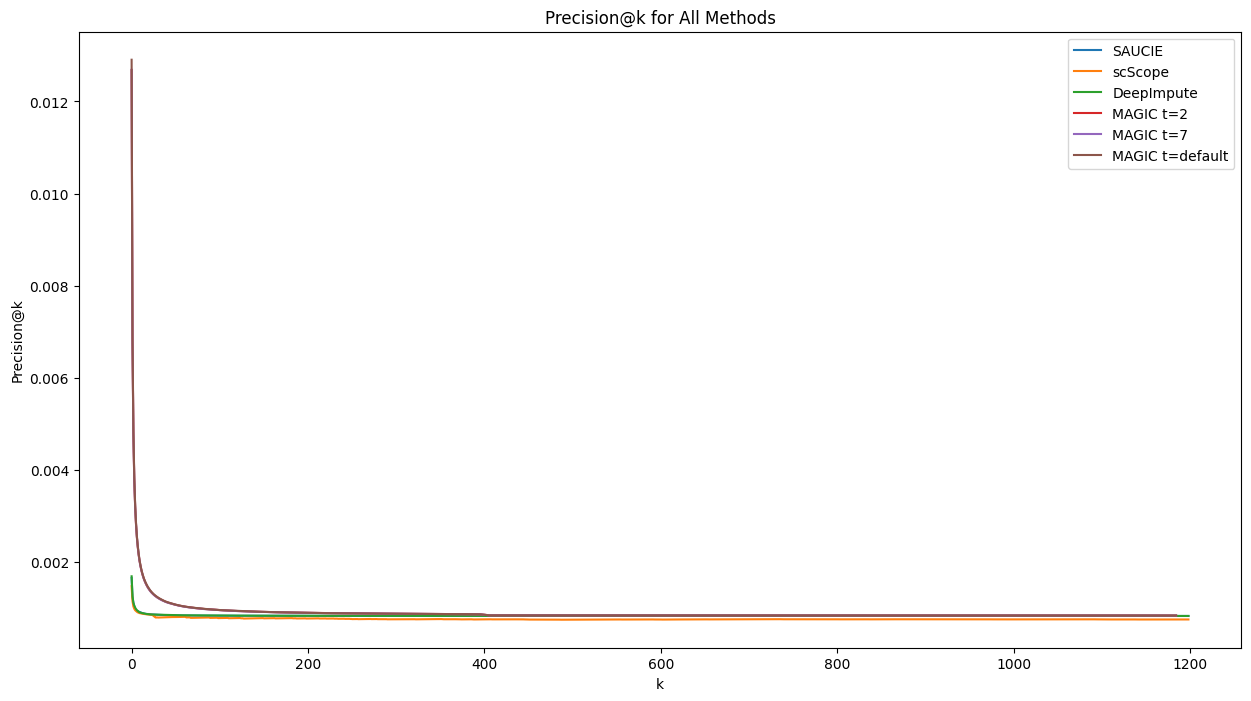

In [21]:
plt.figure(figsize=(15, 8))
for method in methods:
    pr = results[method + strings[0]]
    # flat_pr = results[method + strings[1]]
    # avg_pr = results[method + strings[2]]
    # plot_precisions(pr, flat_pr, avg_pr, method)
    plt.plot(pr, label=method)
plt.xlabel("k")
plt.ylabel("Precision@k")
plt.title("Precision@k for All Methods")
plt.legend()
plt.show()

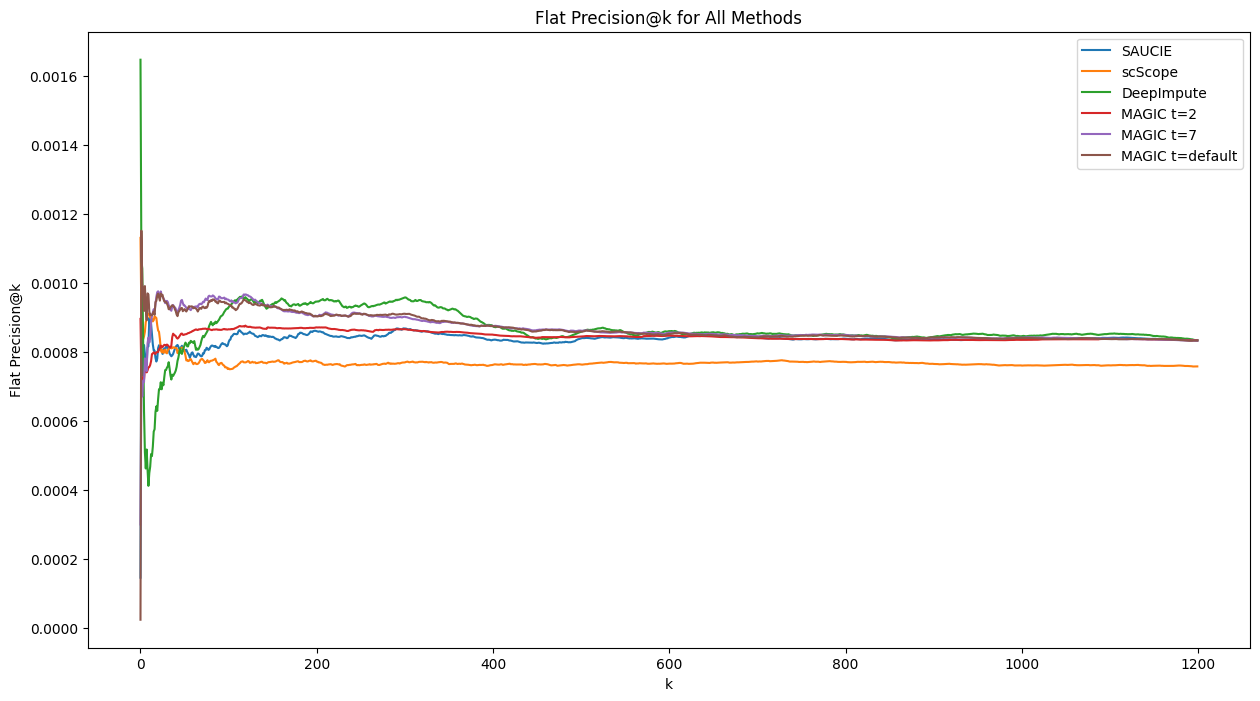

In [22]:
plt.figure(figsize=(15, 8))
for method in methods:
    #pr = results[method + strings[0]]
    flat_pr = results[method + strings[1]]
    # avg_pr = results[method + strings[2]]
    # plot_precisions(pr, flat_pr, avg_pr, method)
    plt.plot(flat_pr, label=method)
plt.xlabel("k")
plt.ylabel("Flat Precision@k")
plt.title("Flat Precision@k for All Methods")
plt.legend()
plt.show()

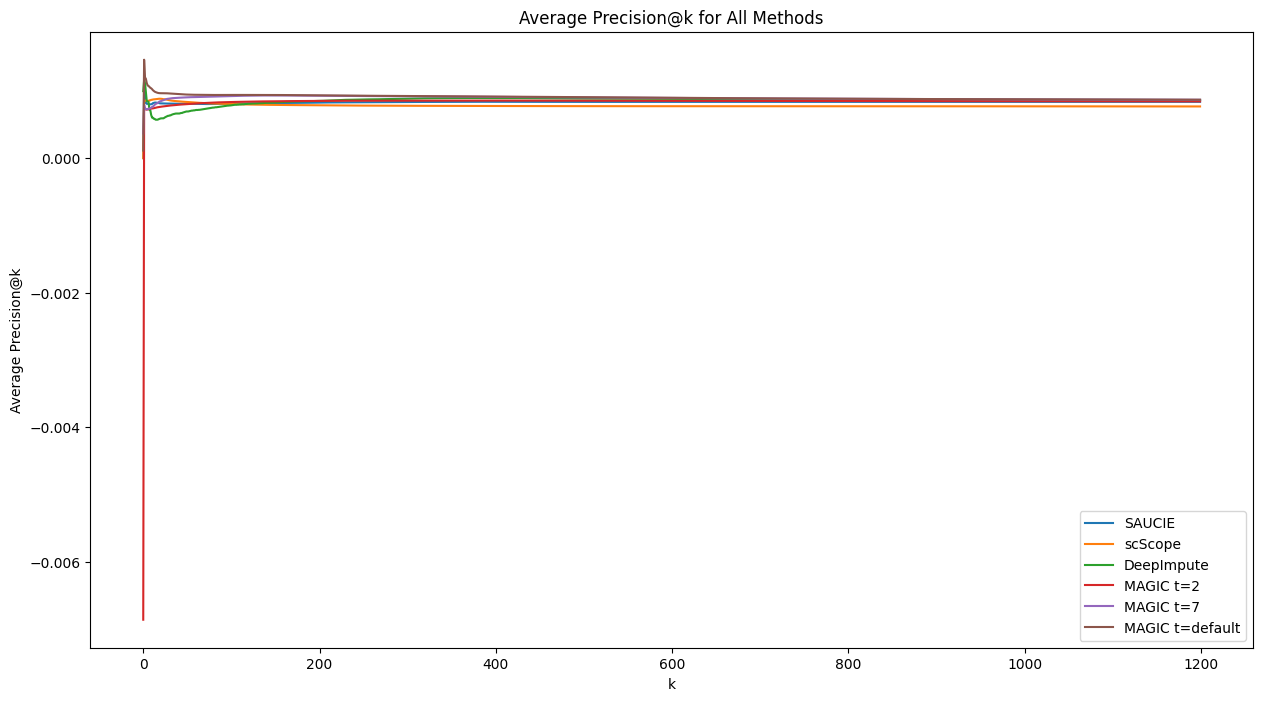

In [28]:
plt.figure(figsize=(15, 8))
for method in methods:
    #pr = results[method + strings[0]]
    #flat_pr = results[method + strings[1]]
    avg_pr = results[method + strings[2]]
    # plot_precisions(pr, flat_pr, avg_pr, method)
    plt.plot(avg_pr, label=method)
plt.xlabel("k")
plt.ylabel("Average Precision@k")
plt.title("Average Precision@k for All Methods")
plt.legend()
plt.show()

In [267]:
def new_recall_k(vim, gt, k_vals, get_locs=False):
    vim_flat = vim.flatten()
    gt_flat = gt.flatten()
    k_averages = []
    for k in tqdm(k_vals):
        recalls = []
        for i, gene in enumerate(vim):
            sorted = gene.argsort()
            top_k = sorted[-k:]
            top_k_gt = gt[i][top_k]
            denom = np.sum(gt[i])
            recall = 0
            if denom != 0:
                recall = np.sum(top_k_gt) / denom                
            recalls.append(recall)
        avg = np.mean(recalls)
        k_averages.append(avg)
    return k_averages

In [245]:
def flat_recall_k(vim, gt, k_vals, get_locs=False):
    vim_flat = vim.flatten()
    gt_flat = gt.flatten()
    sorted = np.argsort(vim_flat)
    recalls = [0] * len(k_vals)
    denom = np.sum(gt_flat)
    gt_sum = 0
    for k in tqdm(k_vals[::-1]):
        top_k = sorted[-k:]
        if k == k_vals[-1]:  
            gt_sum = np.sum(gt_flat[top_k])
        else:
            gt_sum -= gt_flat[top_k[0]]
        recall = 0
        if denom != 0:
            recall = gt_sum / denom  
        recalls[k - 1] = recall
    return recalls

In [ ]:
# k = range(1, gt.size)
# precisions = new_pr_k(vim, gt, range(1, gt.shape[0]))
# flat_precisions, avg_precisions = flat_precision_k(vim, gt, range(1, gt.size))
# recalls = flat_recall_k(vim, gt, k)
# recalls = recalls[::gt.shape[0]]
# flat_precisions = flat_precisions
# avg_precisions = avg_precisions[::gt.shape[0]]

In [ ]:
#plt.plot(pd.DataFrame(recalls), color='orange')

In [3]:
y = np.transpose(np.load('../previous_imputations/DS6_45.npy'))
x = np.transpose(np.load('../previous_imputations/DS6_clean.npy'))

In [4]:
y_curr = np.transpose(np.load('../SERGIO/imputation_data/DS6_45.npy'))
x_curr = np.transpose(np.load('../SERGIO/imputation_data/DS6_clean.npy'))

In [5]:
target_file = '../SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Interaction_cID_6.txt'

In [6]:
def gt_benchmark(virtual_imputation):
    # Create numpy array of same size as imputation_dataset
    gt_temp = np.zeros_like(virtual_imputation)
    f = open(target_file,'r')
    Lines = f.readlines()
    f.close()
    # For each real gene and measured gene expressions, set new array at coordinates to 1
    for j in tqdm(range(len(Lines))):
        line = Lines[j]
        line_list = line.split(',')
        target_index = int(float(line_list[0]))
        num_regs = int(float(line_list[1]))
        # skip if gene is not present in filtered dataset
        if target_index >= gt_temp.shape[1]:
            for i in range(0, target_index + 1 - gt_temp.shape[1]):
                new_column = np.zeros((gt_temp.shape[0], 1), dtype=int)
                gt_temp = np.append(gt_temp, new_column, axis=1)
                virtual_imputation = np.append(virtual_imputation, new_column, axis=1)
        for i in range(num_regs):
            reg_index = int(float(line_list[i+2]))
            gt_temp[reg_index,target_index] = 1  
    return gt_temp, virtual_imputation

In [7]:
# Load SAUCIE imputed data
y_hat_saucie = np.load('../previous_imputations/yhat_saucie.npy')
y_hat_saucie2 = np.load('../SAUCIE/yhat_saucie.npy')

# Load scScope imputed data
y_hat_scscope = np.load('../previous_imputations/yhat_scScope.npy')
y_hat_scscope2 = np.load('../scScope/yhat_scScope.npy')

# Load DeepImpute imputed data
y_hat_deepimp = np.load('../previous_imputations/yhat_deepimp.npy')
y_hat_deepimp2 = np.load('../deepimpute/yhat_deepimp.npy')

# Load MAGIC imputed data
y_hat_magic_t2 = np.load('../MAGIC/yhat_MAGIC_t_2.npy')
y_hat_magic_t7 = np.load('../MAGIC/yhat_MAGIC_t_7.npy')
y_hat_magic_t_auto = np.load('../MAGIC/yhat_MAGIC_t_auto.npy')

In [8]:
print("----------")
print(f"number of zeros in previous clean data: {x.size - np.count_nonzero(x)}")
print(f"number of zeros in previous noisy data: {y.size - np.count_nonzero(y)}")
print(f"number of zeros in current clean data:  {x_curr.size - np.count_nonzero(x_curr)}")
print(f"number of zeros in current noisy data:  {y_curr.size - np.count_nonzero(y_curr)}")
print("----------")
print(f"number of zeros in previous SAUCIE: {y_hat_saucie.size - np.count_nonzero(y_hat_saucie)}")
print(f"number of zeros in current SAUCIE:  {y_hat_saucie2.size - np.count_nonzero(y_hat_saucie2)}")
print("----------")
print(f"number of zeros in previous scscope: {y_hat_scscope.size - np.count_nonzero(y_hat_scscope)}")
print(f"number of zeros in current scscope:  {y_hat_scscope2.size - np.count_nonzero(y_hat_scscope2)}")
print("----------")
print(f"number of zeros in previous deepimpute: {y_hat_deepimp.size - np.count_nonzero(y_hat_deepimp)}")
print(f"number of zeros in current deepimpute:  {y_hat_deepimp2.size - np.count_nonzero(y_hat_deepimp2)}")
print("----------")
print(f"number of zeros in MAGIC t=2:       {y_hat_magic_t2.size - np.count_nonzero(y_hat_magic_t2)}")
print(f"number of zeros in MAGIC t=7:       {y_hat_magic_t7.size - np.count_nonzero(y_hat_magic_t7)}")
print(f"number of zeros in MAGIC t=default: {y_hat_magic_t_auto.size - np.count_nonzero(y_hat_magic_t_auto)}")

----------
number of zeros in previous clean data: 34747
number of zeros in previous noisy data: 3151541
number of zeros in current clean data:  33945
number of zeros in current noisy data:  3185015
----------
number of zeros in previous SAUCIE: 0
number of zeros in current SAUCIE:  1
----------
number of zeros in previous scscope: 452511
number of zeros in current scscope:  333501
----------
number of zeros in previous deepimpute: 1183960
number of zeros in current deepimpute:  1183210
----------
number of zeros in MAGIC t=2:       92512
number of zeros in MAGIC t=7:       0
number of zeros in MAGIC t=default: 0


In [66]:
pd.DataFrame(y_hat_magic_t2).describe(include='all').T['75%'].describe()

count    1195.000000
mean        0.421840
std         2.698270
min         0.010879
25%         0.089034
50%         0.183344
75%         0.342675
max        68.916343
Name: 75%, dtype: float64

In [56]:
pd.DataFrame(y_hat_deepimp).describe(include='all').T['75%'].describe()

count    1200.000000
mean        0.748431
std         1.622393
min         0.000000
25%         0.000000
50%         1.029526
75%         1.080281
max        51.000000
Name: 75%, dtype: float64

In [57]:
pd.DataFrame(y_hat_scscope).describe(include='all').T['75%'].describe()

count    1200.000000
mean        1.005283
std         1.568327
min         0.000000
25%         1.002777
50%         1.065000
75%         1.113207
max        50.969871
Name: 75%, dtype: float64

In [58]:
pd.DataFrame(y).describe(include='all').T['75%'].describe()

count    1200.00000
mean        0.08000
std         1.57024
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        51.00000
Name: 75%, dtype: float64

In [35]:
y_hat_scscope_imp = y_hat_scscope.copy()
y_hat_scscope_imp[y_hat_scscope_imp == 0] = 1e-5

y_hat_scscope_imp_2 = y_hat_scscope2.copy()
y_hat_scscope_imp_2[y_hat_scscope_imp_2 == 0] = 1e-5

In [59]:
pd.DataFrame(y_hat_scscope_imp).describe(include='all').T['75%'].describe()

count    1200.000000
mean        1.005284
std         1.568326
min         0.000010
25%         1.002777
50%         1.065000
75%         1.113207
max        50.969871
Name: 75%, dtype: float64

In [36]:
print(f"number of zeros in previous scscope: {y_hat_scscope_imp.size - np.count_nonzero(y_hat_scscope_imp)}")
print(f"number of zeros in current scscope:  {y_hat_scscope_imp_2.size - np.count_nonzero(y_hat_scscope_imp_2)}")

number of zeros in previous scscope: 0
number of zeros in current scscope:  0


### Run GENIE3 on SAUCIE Data

Previous Data

In [ ]:
VIM_SAUCIE = GENIE3(y_hat_saucie,nthreads=12,ntrees=100)

In [ ]:
gt, rescaled_vim = gt_benchmark(VIM_SAUCIE)

In [14]:
roc_auc_score(gt.flatten(),rescaled_vim.flatten())

0.4538860037246973

Current Data

In [ ]:
VIM_SAUCIE = GENIE3(y_hat_saucie2,nthreads=12,ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads


In [ ]:
gt, rescaled_vim = gt_benchmark(VIM_SAUCIE)

In [ ]:
roc_auc_score(gt.flatten(),rescaled_vim.flatten())

### Run GENIE3 on scScope Data

Previous Data

In [38]:
VIM_scScope = GENIE3(y_hat_scscope_imp,nthreads=12,ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 1540.20 seconds


In [39]:
gt, rescaled_vim = gt_benchmark(VIM_scScope)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 610815.74it/s]


In [40]:
roc_auc_score(gt.flatten(),rescaled_vim.flatten())

0.480381400860843

Current Data

In [41]:
VIM_scScope = GENIE3(y_hat_scscope_imp_2,nthreads=12,ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 1705.55 seconds


In [42]:
gt, rescaled_vim = gt_benchmark(VIM_scScope)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 618769.07it/s]


In [43]:
roc_auc_score(gt.flatten(),rescaled_vim.flatten())

0.4587922618825512

### Run GENIE3 on DeepImpute Data

Previous Data

In [9]:
VIM_DeepImpute = GENIE3(y_hat_deepimp,nthreads=12,ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 1554.65 seconds


In [10]:
gt, rescaled_vim = gt_benchmark(VIM_DeepImpute)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 392058.94it/s]


In [11]:
roc_auc_score(gt.flatten(),rescaled_vim.flatten())

0.32462805057438937

Current Data

In [12]:
VIM_DeepImpute = GENIE3(y_hat_deepimp2,nthreads=12,ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 1535.33 seconds


In [13]:
gt, rescaled_vim = gt_benchmark(VIM_DeepImpute)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 529959.45it/s]


In [14]:
roc_auc_score(gt.flatten(),rescaled_vim.flatten())

0.5091760786093034

### Run GENIE3 on MAGIC Data

In [67]:
VIM_MAGIC = GENIE3(y_hat_magic_t2, nthreads=12, ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 1418.71 seconds


In [68]:
gt, rescaled_vim = gt_benchmark(VIM_MAGIC)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 63455.87it/s]


In [69]:
roc_auc_score(gt.flatten(), rescaled_vim.flatten())

0.523414706575866

In [96]:
VIM_MAGIC = GENIE3(y_hat_magic_t7, nthreads=12, ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 990.08 seconds


In [97]:
gt, rescaled_vim = gt_benchmark(VIM_MAGIC)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 114528.87it/s]


In [98]:
roc_auc_score(gt.flatten(), rescaled_vim.flatten())

0.4972348080309966

In [47]:
VIM_MAGIC = GENIE3(y_hat_magic_t_auto, nthreads=12, ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 1434.76 seconds


In [48]:
gt, rescaled_vim = gt_benchmark(VIM_MAGIC)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 41840.75it/s]


In [49]:
roc_auc_score(gt.flatten(), rescaled_vim.flatten())

0.5004544913467466

### Benchmark: GENIE3 on Clean Data

Previous Data

In [106]:
x = np.transpose(np.load('../previous_imputations/DS6_clean.npy'))

In [107]:
VIM_CLEAN = GENIE3(x, nthreads=12, ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 1067.19 seconds


In [108]:
gt, rescaled_vim = gt_benchmark(VIM_CLEAN)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 694250.76it/s]


In [109]:
roc_auc_score(gt.flatten(), VIM_CLEAN.flatten())

0.8037288061568897

Current Data

In [110]:
x_curr = np.transpose(np.load('../SERGIO/imputation_data/DS6_clean.npy'))

In [111]:
VIM_CLEAN = GENIE3(x_curr, nthreads=12, ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 1045.56 seconds


In [112]:
gt, rescaled_vim = gt_benchmark(VIM_CLEAN)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 755388.08it/s]


In [113]:
roc_auc_score(gt.flatten(), VIM_CLEAN.flatten())

0.8132766785059842

### Benchmark: GENIE3 on Noisy Data

Previous Data

In [114]:
y = np.transpose(np.load('../previous_imputations/DS6_45.npy'))

In [115]:
VIM_NOISY = GENIE3(y, nthreads=12, ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 84.61 seconds


In [116]:
gt, rescaled_vim = gt_benchmark(VIM_NOISY)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 484221.16it/s]


In [117]:
roc_auc_score(gt.flatten(), VIM_NOISY.flatten())

0.42851735929047474

Current Data

In [118]:
y_curr = np.transpose(np.load('../SERGIO/imputation_data/DS6_45.npy'))

In [119]:
VIM_NOISY = GENIE3(y_curr, nthreads=12, ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 12 threads
Elapsed time: 89.39 seconds


In [120]:
gt, rescaled_vim = gt_benchmark(VIM_NOISY)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1133/1133 [00:00<00:00, 701527.37it/s]


In [122]:
roc_auc_score(gt.flatten(), VIM_NOISY.flatten())

0.4402483058634301

### Testing on all files

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sys import modules
#print(sys.getrefcount(tf))
modname = 'deepimpute'
count = 0
for key, mod in modules.copy().items():
    try:
        try:
            if modname in str(mod):
                print("val", key, mod)
                count += 1
            # if key.index(modname) != -1:
            #     print("key", key, modname)
            #     count += 1
        except:
            pass            
    except AttributeError:
        pass
print(count)

val deepimpute <module 'deepimpute' from '/Users/joshuaweiner/Desktop/Folders/Projects/zero_imputation/deepimpute/deepimpute/__init__.py'>
1


In [15]:
l = []
for key in run_results.keys():
    series = run_results[key]
    s_temp = pd.json_normalize(series)
    s_temp['Dataset'] = key
    l.append(s_temp)
temp_df = pd.concat(l).reset_index(drop=True).set_index("Dataset")

In [16]:
temp_df

,SAUCIE
Dataset,
DS3,0.49


In [67]:
temp_df.to_csv('genie3_results_multiple_datasets.csv')

### Create Correlation Plots to Mirror Supplemental Figure 4

In [17]:
from consolidated_runs import create_correlation_plots
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|                                                                                                                        | 0/1 [00:00<?, ?it/s]

---> Calculating correlations for data from DS3


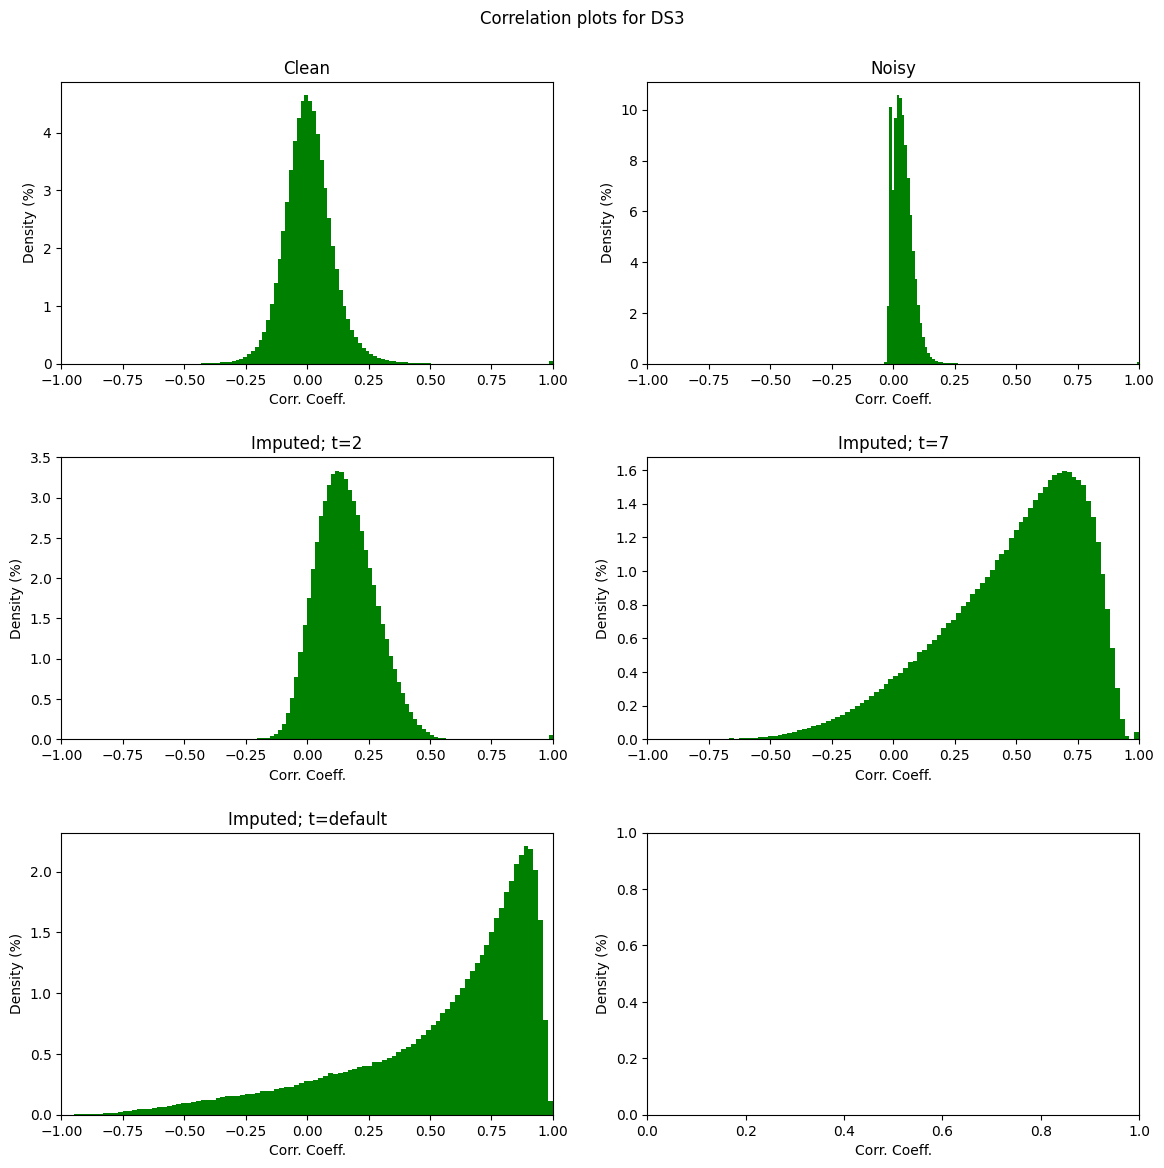

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:33<00:00, 33.37s/it]


In [18]:
datasets = range(3, 4)
#datasets = [1]
run_results = create_correlation_plots(datasets)